<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_22_2%EC%9D%BC%EC%B0%A83%EA%B0%95_ANN%EC%8B%A4%EC%8A%B5_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [24]:
%whos

Variable         Type          Data/Info
----------------------------------------
digit            ndarray       28x28: 784 elems, type `uint8`, 784 bytes
keras            module        <module 'tensorflow.keras<...>i/_v2/keras/__init__.py'>
layers           module        <module 'keras.api._v2.ke<...>eras/layers/__init__.py'>
mnist            module        <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
models           module        <module 'keras.api._v2.ke<...>eras/models/__init__.py'>
network          Sequential    <keras.engine.sequential.<...>object at 0x7fa152fcc610>
plt              module        <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
test_acc         float         0.9832000136375427
test_images      ndarray       10000x784: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
test_labels      ndarray       10000x10: 100000 elems, type `float32`, 400000 bytes (390.625 kb)
test_loss        float         0.07967235893011093
to_categorical   f

In [25]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
%whos

Variable         Type          Data/Info
----------------------------------------
digit            ndarray       28x28: 784 elems, type `uint8`, 784 bytes
keras            module        <module 'tensorflow.keras<...>i/_v2/keras/__init__.py'>
layers           module        <module 'keras.api._v2.ke<...>eras/layers/__init__.py'>
mnist            module        <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
models           module        <module 'keras.api._v2.ke<...>eras/models/__init__.py'>
network          Sequential    <keras.engine.sequential.<...>object at 0x7fa152fcc610>
plt              module        <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
test_acc         float         0.9832000136375427
test_images      ndarray       10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
test_labels      ndarray       10000: 10000 elems, type `uint8`, 10000 bytes
test_loss        float         0.07967235893011093
to_categorical   function      <functi

In [27]:
print(type(train_images))
print(train_images.dtype)
print(train_images.shape)

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)


In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

In [33]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


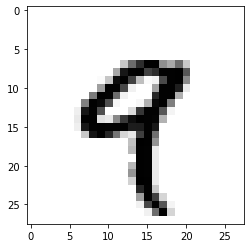

In [35]:
digit = train_images[4]
print(type(digit))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(10, activation='softmax'))

In [37]:
# network.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [38]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


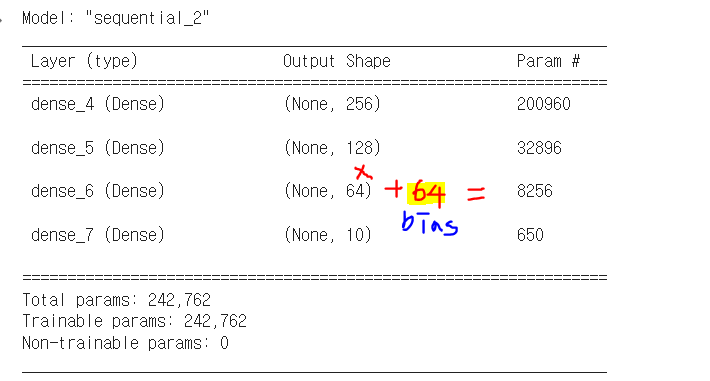

In [39]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [40]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [41]:
print(type(train_labels))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:
# network.fit(train_images, train_labels, epochs=10, batch_size=128)
network.fit(train_images, train_labels, epochs=20, batch_size=128) #  60000/128 = 469

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2480 - accuracy: 0.9269
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0895 - accuracy: 0.9728
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9812
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0416 - accuracy: 0.9868
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0304 - accuracy: 0.9900
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9942

In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9768


In [44]:
print('test_acc:', test_acc)

test_acc: 0.9768000245094299
